# **Data Cleaning**

In [1]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Laden des Datasets und erster Überblick
df = pd.read_csv('Solar_Energy_Production.csv')

# Ausgabe der ersten 5 Zeilen
display(df.head(6))

# Ausgabe der Informationen um einen Überblick über die Anzahl der Zeilen und Spalten, die jeweiligen Datentypen und Non-Null Anzahl der Spalten zu erhalten
display(df.info())

,name,id,address,date,kWh,public_url,installationDate,uid
0,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 08:00:00 AM,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 08:00:00
1,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 09:00:00 AM,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 09:00:00
2,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 10:00:00 AM,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 10:00:00
3,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 11:00:00 AM,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 11:00:00
4,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 12:00:00 PM,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 12:00:00
5,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 01:00:00 PM,7.031,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 13:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258423 entries, 0 to 258422
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              258423 non-null  object 
 1   id                258423 non-null  int64  
 2   address           258423 non-null  object 
 3   date              258423 non-null  object 
 4   kWh               258423 non-null  float64
 5   public_url        258423 non-null  object 
 6   installationDate  258423 non-null  object 
 7   uid               258423 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.8+ MB


None

#### ***Beschreibung der Spalten:***

- `name` | Nominal | kategorisch | Name des installierten Objekts
- `id` | Nominal | kategorisch | einzigartige id des Objekts
- `address` | Nominal | kategorisch | Addressen/Installationsort der Objekte
- `date` | Kardinal Intervall| datetime | Zeitstempel der Produktion von Solarenergie im 12h - Format yyyy/mm/dd hh:mm:ss
- `kWh` | Kardinal Verhältnis| float | Summe der Produktion von Solarenergie
- `public_url` | Nominal | kategorisch | öffentliches Dashboard des Objekts
- `installationDate` | Kardinal  Intervall| datetime | Installationsdatum des Objekts
- `uid` | Nominal | kategorisch | Kombination aus id und date im 24h - Format idyyyy/mm/dd hh:mm:ss

#### ***Erkenntnisse:***

1. Keine Spalte weist fehlende Werte auf Non-Null Count entspricht jeweils entries des RangeIndex
2. Dtype der Spalten muss jeweils angepasst werden:
   - `name` in category
   - `date` in datetime
   - `installationDate` in datetime
3. Spalten die gedropt werden können:
   - `id`
   - `address`
   - `public_url`
   - `uid`

In [3]:
# droppen der Spalten
df = df.drop(['id', 'address', 'public_url', 'uid'], axis='columns')

In [4]:
# Datentypen korrigieren
df['name'] = df.name.astype('category')
df['date'] = pd.to_datetime(df.date, format='%Y/%m/%d %I:%M:%S %p')
df['installationDate'] = pd.to_datetime(df.installationDate, format='%Y/%m/%d')

- **Untersuchung der einzelnen Spalten nach Auffälligkeiten**

In [5]:
# Untersuchung numerische Spalte kWh
display(df.kWh.describe())
print('Modus = {}'.format(df.kWh.agg('mode')[0]))

count    258423.000000
mean         38.059762
std          71.598031
min           0.000000
25%           1.370000
50%           8.034000
75%          35.876000
max         514.462000
Name: kWh, dtype: float64

Modus = 0.001


In [6]:
# Untersuchung kategorische Spalten
display(pd.DataFrame(df.name.unique(), columns=['name']).sort_values(by='name').reset_index(drop=True))
display(pd.DataFrame(df.installationDate.unique(), columns=['installationDate']).sort_values(by='installationDate').reset_index(drop=True))

,name
0,Bearspaw Water Treatment Plant
1,CFD Firehall #7
2,Calgary Fire Hall Headquarters
3,City of Calgary North Corporate Warehouse
4,Glenmore Water Treatment Plant
5,Hillhurst Sunnyside Community Association
6,Manchester Building M
7,Richmond - Knob Hill Community Hall
8,Southland Leisure Centre
9,Telus Spark


,installationDate
0,2015-09-01
1,2016-09-25
2,2016-11-07
3,2016-11-21
4,2016-12-13
5,2016-12-21
6,2017-01-11
7,2017-09-13
8,2017-10-23
9,2017-10-31


In [7]:
# Untersuchung der Datumsspalten
print('Der erste Zeitstempel des DataFrame ist am {} und der letzte am {}.'.format(df.date.min(), df.date.max()))

Der erste Zeitstempel des DataFrame ist am 2015-09-01 14:30:00 und der letzte am 2023-03-16 19:00:00.


#### ***Erkenntnisse:***

1) In Spalte `kWh` sind 25 % aller Werte kleiner als 1.37 und 25 % größer als 35.876, der Modus liegt bei 0.001, der Median bei 8.03, der Mean bei 38.06. Die Verteilung der Datenpunkte ist damit rechtsschief. Ansonsten sind keine Auffälligkeiten vorhanden.
2) Die kategorischen Spalte `name` weist ebenfalls keine Auffälligkeiten auf.
3) Die beiden Datumsspalten `date` und `installationDate` weisen auch keine Auffälligkeiten auf.  

- **Untersuchung nach Duplikaten**

In [8]:
df.loc[df.duplicated()]

,name,date,kWh,installationDate


<div class="alert alert-block alert-success">Es sind keine Duplikate vorhanden.</div>

# EDA

- **Berechnung des Alters ein jeder Anlage**

In [9]:
# leeres Dictionary erstellen
ages_of_objects = {}

# über die einzelnen Objekte im DataFrame df iterrieren 
for object in df.name.unique():
    df_object = df.loc[df.name == object] # Objektdaten extrahieren
    age = (df_object.date.max() - df_object.installationDate).dt.days.max() # Alter berechnen
    ages_of_objects[object] = age # Wertepaare bilden

# Dictionary in DataFrame umwandeln und ausgeben
df_age = pd.DataFrame(ages_of_objects.values(), # DataFrame erstellen
                     index=ages_of_objects.keys(), 
                     columns=['age_in_days']
                    ).sort_values(by='age_in_days', # absteigend sortieren nach Alter
                                  ascending=False
                                 )

df_age.style.background_gradient(cmap='Reds', vmin=df_age.mean()) # farbliche Hinterlegung nach Größe mit Orientierung am durchschnitt

,age_in_days
Southland Leisure Centre,2753
Hillhurst Sunnyside Community Association,2362
Calgary Fire Hall Headquarters,2320
Richmond - Knob Hill Community Hall,2306
Whitehorn Multi-Service Centre,2284
City of Calgary North Corporate Warehouse,2276
Glenmore Water Treatment Plant,2251
CFD Firehall #7,2010
Manchester Building M,1970
Bearspaw Water Treatment Plant,1962


- **Berechnung der bisher absolut erzeugten Energie pro Anlage**

In [10]:
# leeres Dictionary erstellen
MWh_sum_of_objects = {}

# über die einzelnen Objekte im DataFrame df iterrieren 
for object in df.name.unique():
    MWh = round(df.loc[df.name == object, 'kWh'].sum() / 1000, 3) # Objektdaten extrahieren und Summe berechnen
    MWh_sum_of_objects[object] = MWh # Wertepaare bilden

# Dictionary in DataFrame umwandeln und ausgeben
df_MWh_sum = pd.DataFrame(MWh_sum_of_objects.values(), # DataFrame erstellen
                          index=MWh_sum_of_objects.keys(), 
                          columns=['total_MWh']
                         ).sort_values(by='total_MWh', # absteigend sortieren nach Alter
                                       ascending=False
                                      )

df_MWh_sum.style.format("{:.3f}").background_gradient(cmap='Reds', vmin=df_MWh_sum.mean()) # farbliche Hinterlegung nach Größe mit Orientierung am durchschnitt

,total_MWh
Bearspaw Water Treatment Plant,3082.638
Whitehorn Multi-Service Centre,2558.803
Glenmore Water Treatment Plant,1551.178
Southland Leisure Centre,1147.494
City of Calgary North Corporate Warehouse,768.965
Hillhurst Sunnyside Community Association,186.441
Manchester Building M,183.243
CFD Firehall #7,170.081
Calgary Fire Hall Headquarters,110.212
Richmond - Knob Hill Community Hall,75.130


- **Untersuchung der Verteilung der Werte nach Tagen pro Anlage**

- Boxplot und deskriptive Statistiken

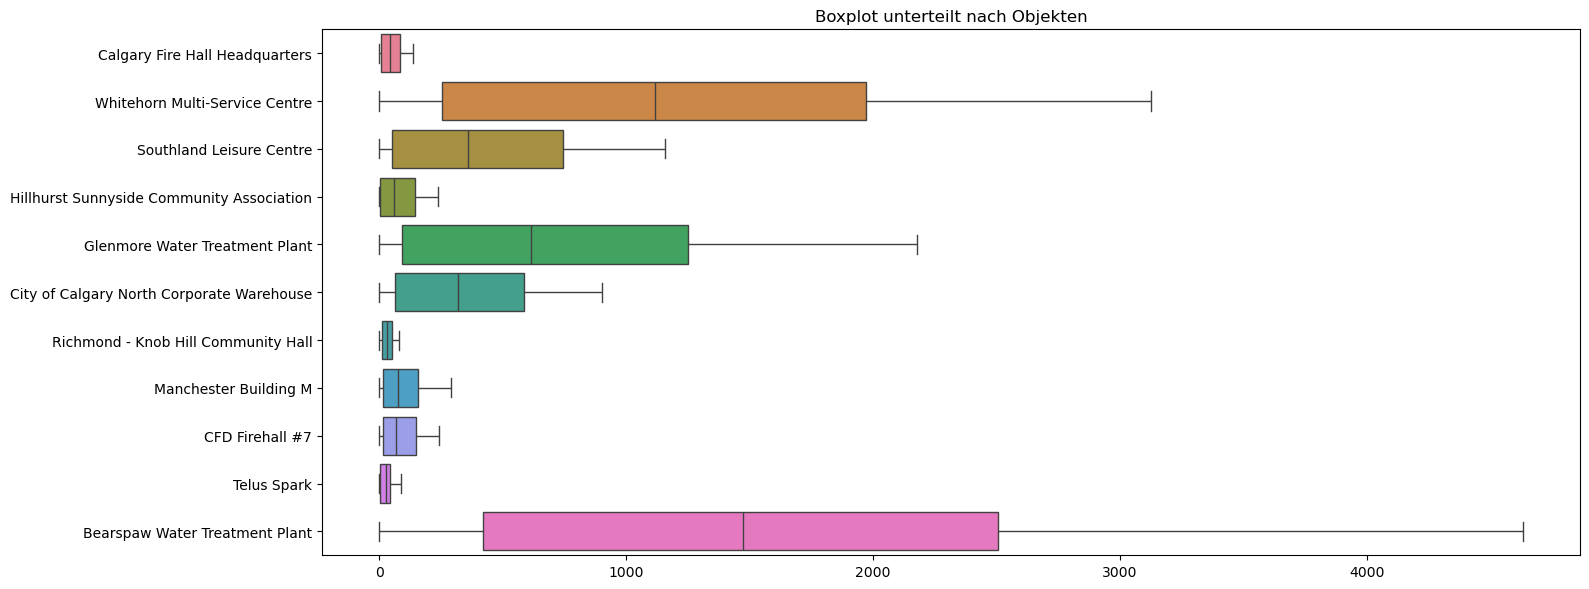

,Calgary Fire Hall Headquarters,Whitehorn Multi-Service Centre,Southland Leisure Centre,Hillhurst Sunnyside Community Association,Glenmore Water Treatment Plant,City of Calgary North Corporate Warehouse,Richmond - Knob Hill Community Hall,Manchester Building M,CFD Firehall #7,Telus Spark,Bearspaw Water Treatment Plant
count,2304.000000,2223.000000,2754.000000,2355.000000,2196.00000,2275.000000,2289.000000,1989.000000,2003.000000,46.000000,1942.000000
mean,47.834901,1151.058257,416.664352,79.168265,706.36508,338.006435,32.822316,92.128327,84.913074,29.012478,1587.352006
std,40.429662,905.238080,358.672373,72.981603,615.40272,273.711118,23.613284,82.777929,73.190234,24.478746,1236.993819
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.972750,255.684000,53.905750,3.394000,93.83625,65.517500,10.795000,14.357000,13.924000,1.659250,420.390750
50%,44.760500,1118.565000,360.958500,58.597000,616.00700,318.748000,31.769000,74.307000,69.535000,28.904500,1473.420000
75%,85.478000,1971.605500,744.191250,144.835500,1249.79700,586.634000,53.768000,157.358000,149.375500,44.949750,2504.006500
max,137.165000,3124.982000,1159.221000,239.948000,2176.16600,902.644000,78.967000,288.917000,240.816000,89.006000,4630.182000


In [11]:
# leeres Dictionary erstellen
bib = {}

# über die einzelnen Objekte im DataFrame df iterrieren 
for object in df.name.unique():
    datas = df.loc[df.name == object]\
                    .set_index('date')\
                    .resample('D')\
                    .sum(numeric_only=True)
    
    bib[object] = datas['kWh'] # Wertepaare bilden
    
# Dictionary in DataFrame umwandeln und ausgeben
df_by_name = pd.DataFrame(bib)

plt.figure(figsize=(16,6))
sns.boxplot(df_by_name, orient='h')
plt.title('Boxplot unterteilt nach Objekten')
plt.tight_layout()
plt.show()

display(df_by_name.describe())

<div class="alert alert-block alert-success">Im Boxplot und der desktiptiven Statistik ist zu erkennen, dass alle Anlagen Tage ohne Erzeugung aufweisen. Darum möchte ich wissen, von wievielen Tagen wir jeweils sprechen.</div>

- **Berechnung der Anzahl an Tagen ohne Erzeugung pro Anlage**

In [12]:
days_lost_per_objects = {}

for object in df.name.unique():
    count = len( # die Länge des DataFrame bestimmen
                df.loc[df.name == object]\
                    .set_index('date')\
                    .resample('D')\
                    .sum(numeric_only=True)\
                    .query('kWh == 0') # Daten extrahieren, Neuindexierung, Zusammenfassung, Aggregation, nach Tagen ohne Erzeugung filtern
               )
    
    days_lost_per_objects[object] = count # Wertepaare bilden

# Dictionary in DataFrame umwandeln und ausgeben
df_days_lost = pd.DataFrame(days_lost_per_objects.values(), # DataFrame erstellen
                         index=days_lost_per_objects.keys(), 
                         columns=['days_without_generation']
                        ).sort_values(by='days_without_generation', # absteigend sortieren nach Alter
                                      ascending=False
                                     )

df_days_lost['total_days'] = df_age.copy()
df_days_lost['percentage_of_age'] = round(df_days_lost.days_without_generation / df_days_lost.total_days * 100, 2)
df_days_lost.drop('total_days', axis=1, inplace=True)
df_days_lost.style.background_gradient(cmap='Reds') # farbliche Hinterlegung nach Größe

,days_without_generation,percentage_of_age
Hillhurst Sunnyside Community Association,366,15.500000
Southland Leisure Centre,251,9.120000
Calgary Fire Hall Headquarters,187,8.060000
Glenmore Water Treatment Plant,135,6.000000
CFD Firehall #7,131,6.520000
Manchester Building M,125,6.350000
Richmond - Knob Hill Community Hall,91,3.950000
City of Calgary North Corporate Warehouse,83,3.650000
Bearspaw Water Treatment Plant,44,2.240000
Whitehorn Multi-Service Centre,37,1.620000


- **Berechnung des Mittelwertes der erzeugten Energie pro Tag und Anlage**

In [13]:
# leeres Dictionary erstellen
median_kWh_of_objects = {}

# über die einzelnen Objekte im DataFrame df iterrieren 
for object in df.name.unique():
    median = df.loc[df.name == object]\
                    .set_index('date')\
                    .resample('D')\
                    .sum(numeric_only=True)\
                    .query('kWh != 0')\
                    .median()[0] # Daten extrahieren, Neuindexierung, Zusammenfassung, Aggregation, nach Tagen ohne Erzeugung filtern, Median berechnen
    
    median_kWh_of_objects[object] = median # Wertepaare bilden
    
# Dictionary in DataFrame umwandeln und ausgeben
df_kWh_median = pd.DataFrame(median_kWh_of_objects.values(), # DataFrame erstellen
                         index=median_kWh_of_objects.keys(), 
                         columns=['median_kWh_per_day']
                        ).sort_values(by='median_kWh_per_day', # absteigend sortieren nach Alter
                                      ascending=False
                                     )

df_kWh_median.style.format("{:.3f}").background_gradient(cmap='Reds') # farbliche Hinterlegung nach Größe

,median_kWh_per_day
Bearspaw Water Treatment Plant,1519.314
Whitehorn Multi-Service Centre,1162.563
Glenmore Water Treatment Plant,696.918
Southland Leisure Centre,448.195
City of Calgary North Corporate Warehouse,346.871
Hillhurst Sunnyside Community Association,90.667
Manchester Building M,84.458
CFD Firehall #7,84.017
Calgary Fire Hall Headquarters,52.455
Telus Spark,35.096


- **Berechnung der möglicherweise verlorenen Energiemenge durch Tage ohne Produktion**

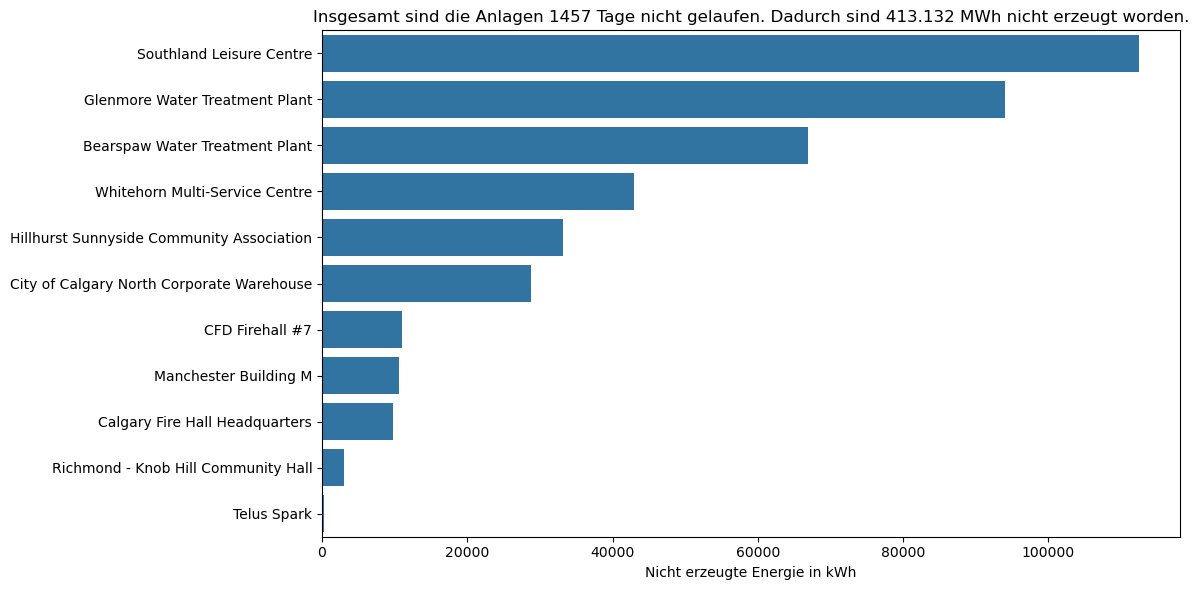

In [14]:
# DataFrame erstellen und berechnen
df_energy_lost= df_kWh_median.copy()
df_energy_lost['days_without_production'] = df_days_lost.days_without_generation
df_energy_lost['possible_total_lost_in_kWh'] = round(df_energy_lost.days_without_production * df_energy_lost.median_kWh_per_day)

# Ergebnis plotten
plt.figure(figsize=(12,6))
sns.barplot(df_energy_lost, 
            x='possible_total_lost_in_kWh', 
            y=df_energy_lost.index, 
            orient='h', 
            order=df_energy_lost.sort_values(by='possible_total_lost_in_kWh', 
                                             ascending=False
                                            ).index)
plt.title('Insgesamt sind die Anlagen {} Tage nicht gelaufen. Dadurch sind {} MWh nicht erzeugt worden.'.format(df_energy_lost.days_without_production.sum(), 
                                                                                                            df_energy_lost.possible_total_lost_in_kWh.sum() / 1000))
plt.xlabel('Nicht erzeugte Energie in kWh')
plt.ylabel('')
plt.tight_layout()
plt.show()

- **Berechnung und Ausdruck der Saisonalität der gesamten erzeugten Energiemenge**

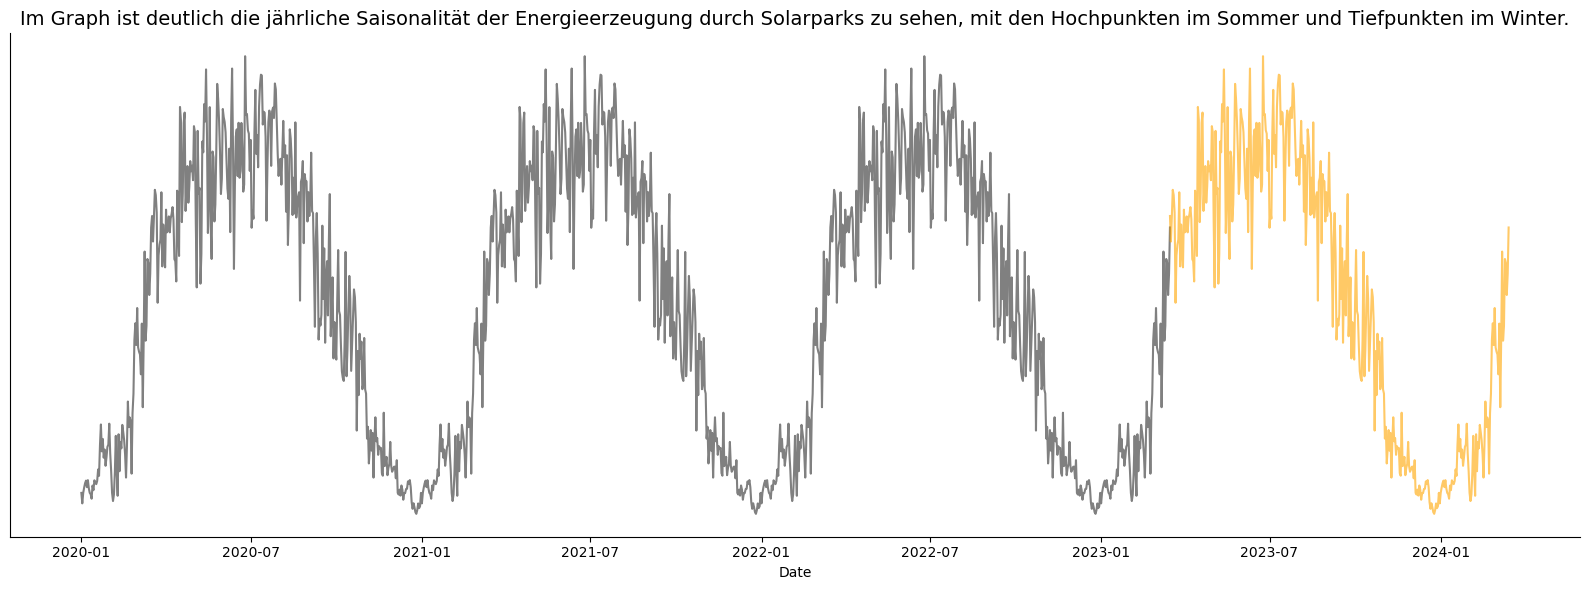

In [15]:
# DataFrame df_seasonal erstellen
df_resampled = df.set_index('date').resample('D').sum(numeric_only=True)

# Saisonalität berechnen
decomposition = seasonal_decompose(df_resampled, model='additive', period=365)  # 252 Handelstage im Jahr

# Saisonale Daten der letzten 3 Jahre extrahieren
seasonal = decomposition.seasonal[str(df_resampled[-365*3:].index.year.min()):]


# DateRange für die nächsten 12 Monate erstellen
next_six_months = pd.date_range(start=df_resampled.index.max(), periods=365)

# Plot erstellen
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(seasonal, 
        color='grey')
ax.set_xlabel('Date')
ax.tick_params(axis='y', 
               labelcolor='black'
              )
ax.set_yticklabels('')
ax.set_yticks([])
ax.set_title('Im Graph ist deutlich die jährliche Saisonalität der Energieerzeugung durch Solarparks zu sehen, mit den Hochpunkten im Sommer und Tiefpunkten im Winter.',
             fontsize=14)

# Saisonaler Forecast
plt.plot(next_six_months, 
         seasonal[-365:], 
         color='orange', 
         alpha=0.6) 

ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()